In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# something needed for heat maps..... 🤔
import seaborn as sns
import missingno as msno

In [2]:
# Suppress Warning DO NOT LEAVE THIS ON ALL THE TIME CAN MUTE ERRORS!!
import warnings

# Suppress specific warnings
warnings.simplefilter(action="ignore", category=UserWarning)

In [3]:
# Read csv and create DataFrame
data_csv = pd.read_csv("../data/flights.csv")
df = pd.DataFrame(data_csv).set_index("id")

FileNotFoundError: [Errno 2] No such file or directory: '../data/flights.csv'

In [4]:
# Create column descriptions
"""
  
"""
columns_legend = {
    "id": "Unique identifier for each flight record",
    "year": "Year the flight was recorded (Gregorian calendar)",
    "month": "Numerical value of the month the flight occurred (1-12)",
    "day": "Day of the month when the flight occurred (1-31)",
    "dep_time": "Actual departure time (24-hour format, hhmm)",
    "sched_dep_time": "Scheduled departure time (24-hour format, hhmm)",
    "dep_delay": "Minutes difference between scheduled and actual departure (positive for delay, negative for early departure)",
    "arr_time": "Actual arrival time (24-hour format, hhmm)",
    "sched_arr_time": "Scheduled arrival time (24-hour format, hhmm)",
    "arr_delay": "Minutes difference between scheduled and actual arrival (positive for delay, negative for early arrival)",
    "carrier": "Two-letter airline carrier code (e.g., AA for American Airlines)",
    "flight": "Flight number assigned to the flight",
    "tailnum": "Unique aircraft tail number",
    "origin": "Three-letter code of the departure airport",
    "dest": "Three-letter code of the destination airport",
    "air_time": "Total time in the air, in minutes (excludes ground time)",
    "distance": "Distance traveled from origin to destination, in miles",
    "hour": "Hour of scheduled departure time (24-hour format)",
    "minute": "Minute of scheduled departure time",
    "time_hour": "Full timestamp for scheduled departure (yyyy-mm-dd hh:mm:ss, 24-hour format)",
    "name": "Full name of the airline carrier",
}

# Display legend as dataframe
df_cl = pd.DataFrame(
    list(columns_legend.items()), columns=["Column Name", "Description"]
)
df_cl = df_cl.style.set_properties(**{"text-align": "left"})
df_cl

,Column Name,Description
0,id,Unique identifier for each flight record
1,year,Year the flight was recorded (Gregorian calendar)
2,month,Numerical value of the month the flight occurred (1-12)
3,day,Day of the month when the flight occurred (1-31)
4,dep_time,"Actual departure time (24-hour format, hhmm)"
5,sched_dep_time,"Scheduled departure time (24-hour format, hhmm)"
6,dep_delay,"Minutes difference between scheduled and actual departure (positive for delay, negative for early departure)"
7,arr_time,"Actual arrival time (24-hour format, hhmm)"
8,sched_arr_time,"Scheduled arrival time (24-hour format, hhmm)"
9,arr_delay,"Minutes difference between scheduled and actual arrival (positive for delay, negative for early arrival)"


In [5]:
# Give columns_legend to df as attributes
df.attrs = columns_legend

## DataFrame Exploration
- Summarize & Visualize Data
- Identify Patterns
- Find Relationships
- Note Potential Anomalies

## Exploration Scope
We want to know two things:
- which airlines have the max/min delays
- which airport have the max/min delays


In [6]:
# Examine df
df.attrs

{'id': 'Unique identifier for each flight record',
 'year': 'Year the flight was recorded (Gregorian calendar)',
 'month': 'Numerical value of the month the flight occurred (1-12)',
 'day': 'Day of the month when the flight occurred (1-31)',
 'dep_time': 'Actual departure time (24-hour format, hhmm)',
 'sched_dep_time': 'Scheduled departure time (24-hour format, hhmm)',
 'dep_delay': 'Minutes difference between scheduled and actual departure (positive for delay, negative for early departure)',
 'arr_time': 'Actual arrival time (24-hour format, hhmm)',
 'sched_arr_time': 'Scheduled arrival time (24-hour format, hhmm)',
 'arr_delay': 'Minutes difference between scheduled and actual arrival (positive for delay, negative for early arrival)',
 'carrier': 'Two-letter airline carrier code (e.g., AA for American Airlines)',
 'flight': 'Flight number assigned to the flight',
 'tailnum': 'Unique aircraft tail number',
 'origin': 'Three-letter code of the departure airport',
 'dest': 'Three-lette

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute         

### Insights from df.info()

Right away we can see that these columns have missing data.
This was most likely cause by canceled flights, error in data entry, or a just a simple reporting issue

### Follow up Query

What (if any) patterns are there in the missing data? Such as certain airline, specific times of year, weather patterns, ect.

In [8]:
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [9]:
df.isnull().corr()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dep_time,NaN,NaN,NaN,1.000000,NaN,1.000000,0.972684,NaN,0.933952,NaN,NaN,0.546875,NaN,NaN,0.933952,NaN,NaN,NaN,NaN,NaN
sched_dep_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dep_delay,NaN,NaN,NaN,1.000000,NaN,1.000000,0.972684,NaN,0.933952,NaN,NaN,0.546875,NaN,NaN,0.933952,NaN,NaN,NaN,NaN,NaN
arr_time,NaN,NaN,NaN,0.972684,NaN,0.972684,1.000000,NaN,0.960181,NaN,NaN,0.531936,NaN,NaN,0.960181,NaN,NaN,NaN,NaN,NaN
sched_arr_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arr_delay,NaN,NaN,NaN,0.933952,NaN,0.933952,0.960181,NaN,1.000000,NaN,NaN,0.510755,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
carrier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


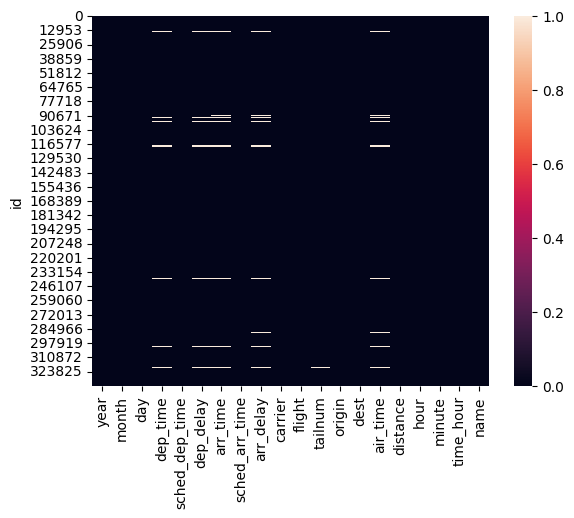

In [10]:
"""
  This is for fun.
  Try and create a heat map to visualize missing data patterns
"""

sns.heatmap(df.isnull())
plt.show()

<Axes: >

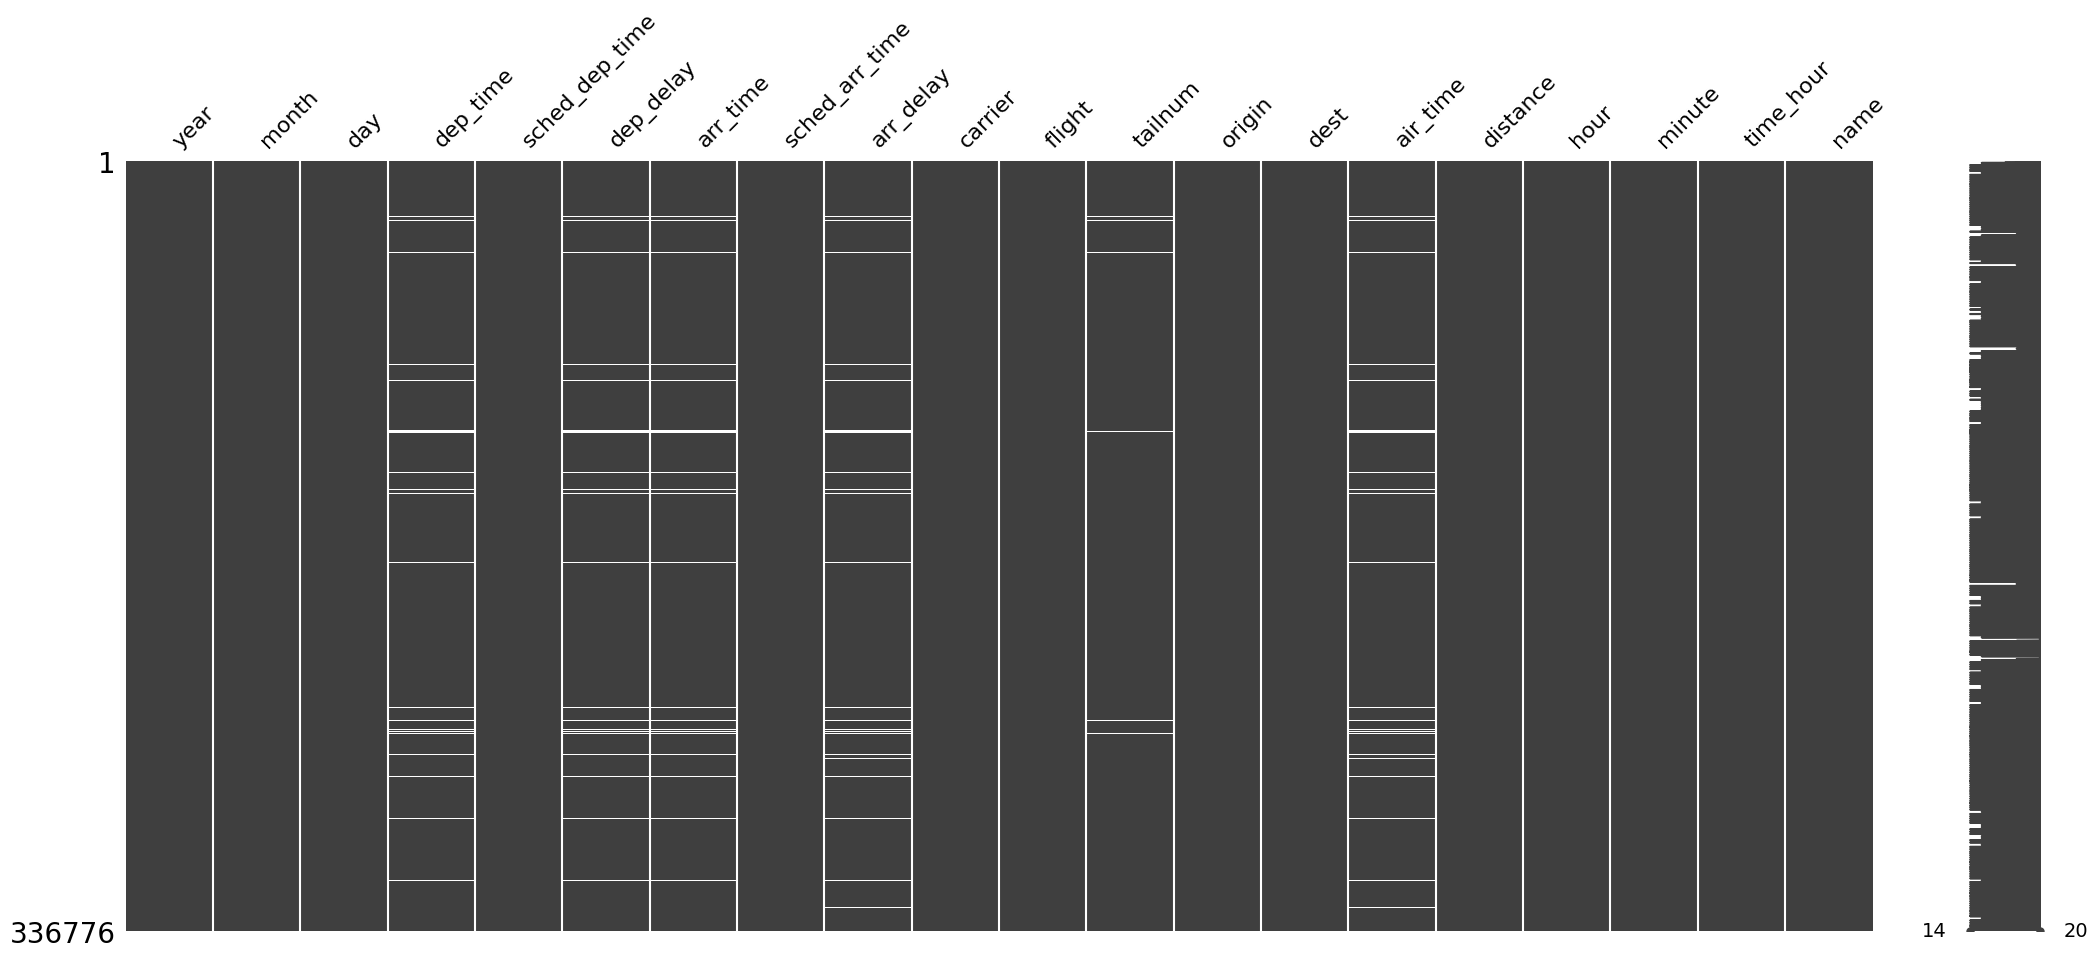

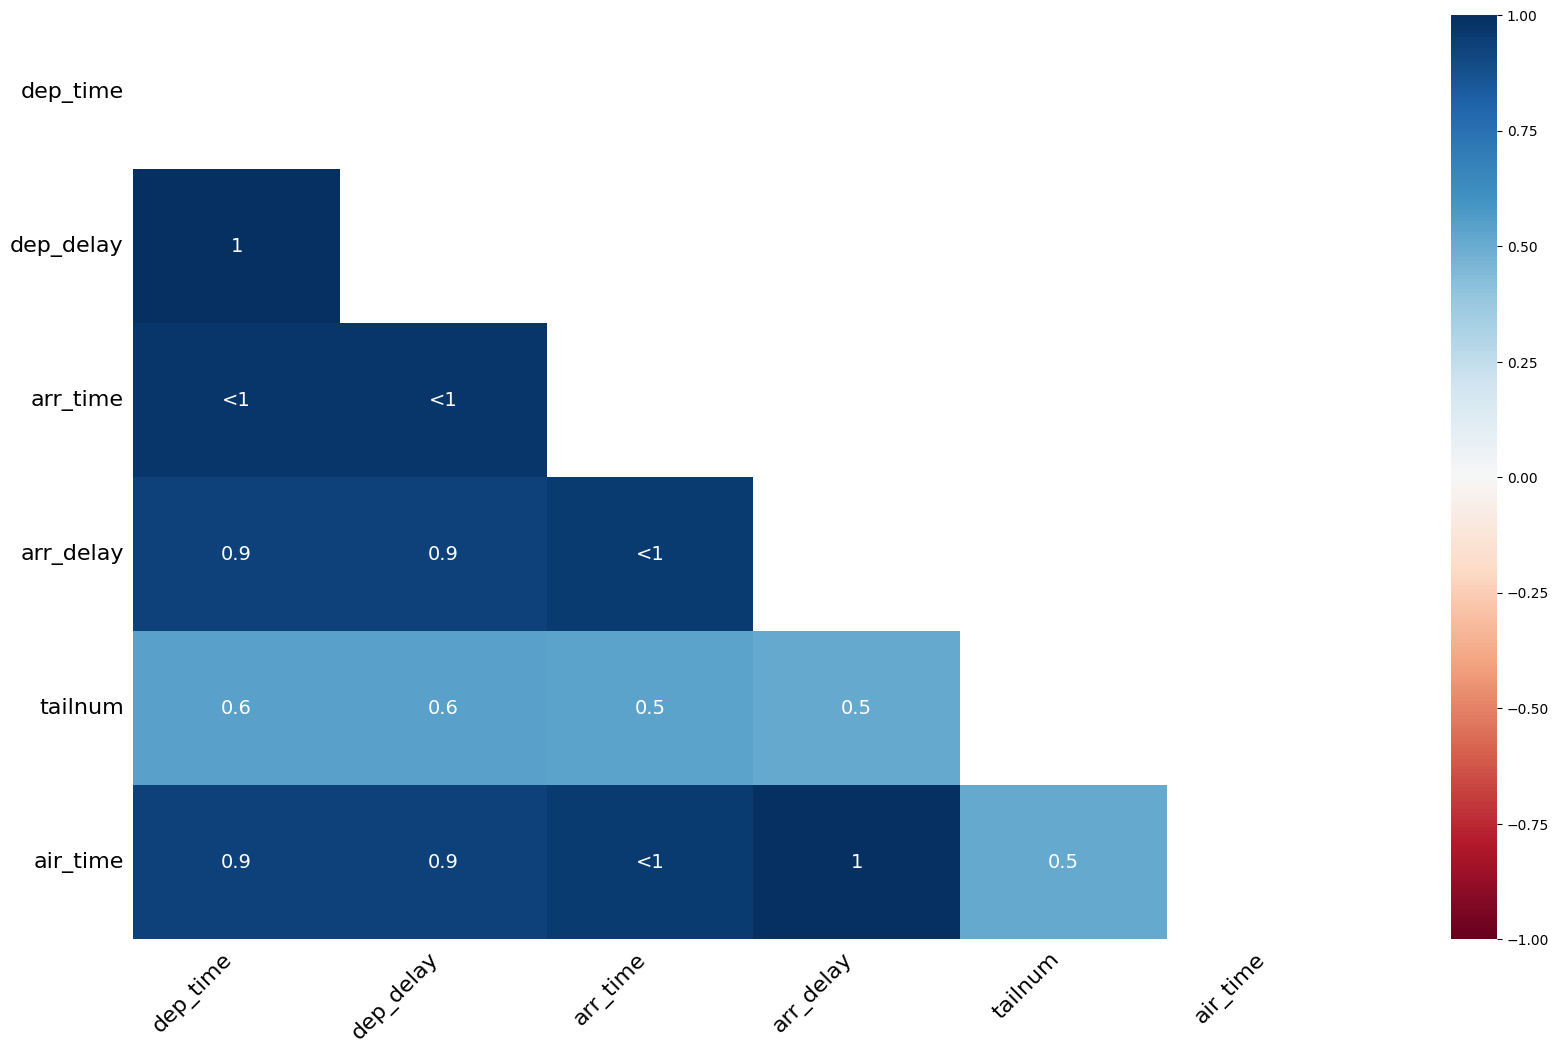

In [11]:
msno.matrix(df)
msno.heatmap(df)

In [12]:
df = df.dropna(how="any")

In [13]:
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute         

In [15]:
df.sample(n=5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
107826,2013,12,27,2151.0,2155,-4.0,2324.0,2334,-10.0,B6,985,N283JB,JFK,RDU,70.0,427,21,55,2013-12-27 21:00:00,JetBlue Airways
76467,2013,11,23,634.0,632,2.0,853.0,854,-1.0,EV,4122,N14558,EWR,SDF,117.0,642,6,32,2013-11-23 06:00:00,ExpressJet Airlines Inc.
29675,2013,10,3,1730.0,1734,-4.0,2044.0,2053,-9.0,UA,1668,N77510,EWR,SFO,349.0,2565,17,34,2013-10-03 17:00:00,United Air Lines Inc.
239955,2013,6,19,2048.0,2010,38.0,2219.0,2150,29.0,UA,518,N853UA,EWR,ORD,107.0,719,20,10,2013-06-19 20:00:00,United Air Lines Inc.
58413,2013,11,3,2040.0,2040,0.0,13.0,2359,14.0,B6,523,N796JB,JFK,LAX,350.0,2475,20,40,2013-11-03 20:00:00,JetBlue Airways


#### Examine data description
Isolate relevant columns and study their deviations

What are we trying to isolate?
	- 
What questions are we trying to answer?

In [16]:
"""
  Summarize dataframe.
  
  Not all columns need to or can be summarized. Look
  for columns that can be used to gain better insight
  into flight delays. Columns not specifically used
  for delay tracking may help gain greater insights.
"""

df[
    ["dep_time", "dep_delay", "arr_time", "arr_delay", "air_time", "distance"]
].describe().T

,count,mean,std,min,25%,50%,75%,max
dep_time,327346.0,1348.789883,488.319979,1.0,907.0,1400.0,1744.0,2400.0
dep_delay,327346.0,12.555156,40.065688,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,327346.0,1501.908238,532.888731,1.0,1104.0,1535.0,1940.0,2400.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.686460,93.688305,20.0,82.0,129.0,192.0,695.0
distance,327346.0,1048.371314,735.908523,80.0,509.0,888.0,1389.0,4983.0


#### What does this tell us?
- Average departure delay: 12 minutes
- Average arrival delay: 6 minutes
- Average airtime: 150 minutes
- Average distance: 1048 miles

##### follow up questions?
- What do these numbers tell us?
- What can we learn from summarizing data based on airlines, aircraft or specific craft number
Note: Most data analysis is best done with numerical values. 

#### Convert dep_time & sched_dep_time to 24H timestamp

In [17]:
"""
  It may be best to create new columns containing the seconds-since-midnight.
  This will let us numerically evaluate the data. As well as create pandas
  datetimestamps for other evaluation methods
"""

dfc = df.copy()

# clean & normalize time columns
dfc.dep_time = dfc.dep_time.astype(int)  # whole int for minutes
dfc.dep_time = dfc.dep_time.astype(str).str.zfill(
    4
)  # zfill(4) is to ensure that all timestamps have 4 digits

dfc.sched_dep_time = dfc.sched_dep_time.astype(str).str.zfill(4)

dfc.dep_delay = dfc.dep_delay.astype(int)

dfc.arr_time = dfc.arr_time.astype(int)
dfc.arr_time = dfc.arr_time.astype(str).str.zfill(4)

dfc.sched_arr_time = dfc.sched_arr_time.astype(str).str.zfill(4)

dfc.arr_delay = dfc.arr_delay.astype(int)

dfc.air_time = dfc.air_time.astype(int)

# Convert columns to datetime
dfc.dep_time = pd.to_datetime(dfc.dep_time, format="%H%M%S").dt.strftime("%H:%M:%S")

dfc.sched_dep_time = pd.to_datetime(dfc.sched_dep_time, format="%H%M%S").dt.strftime(
    "%H:%M:%S"
)

dfc.arr_time = pd.to_datetime(dfc.arr_time, format="%H%M%S").dt.strftime("%H:%M:%S")
dfc.sched_arr_time = pd.to_datetime(dfc.sched_arr_time, format="%H%M%S").dt.strftime(
    "%H:%M:%S"
)

# Create minutes columns
dfc.insert(
    4,
    "dt_min",
    pd.to_datetime(dfc.dep_time).dt.hour * 60 + pd.to_datetime(dfc.dep_time).dt.minute,
)  # this is to keep the original str formate in the dfc.dep_time column

dfc.insert(
    6,
    "sdt_min",
    pd.to_datetime(dfc.sched_dep_time).dt.hour * 60
    + pd.to_datetime(dfc.sched_dep_time).dt.minute,
)

dfc.insert(
    8,
    "rt_min",
    pd.to_datetime(dfc.arr_time).dt.hour * 60 + pd.to_datetime(dfc.arr_time).dt.minute,
)  # this is to keep the original str formate in the dfc.dep_time column

dfc.insert(
    10,
    "srt_min",
    pd.to_datetime(dfc.sched_arr_time).dt.hour * 60
    + pd.to_datetime(dfc.sched_arr_time).dt.minute,
)

In [18]:
dfc.sample(n=5)

,year,month,day,dep_time,dt_min,sched_dep_time,sdt_min,dep_delay,rt_min,arr_time,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,,
114331,2013,2,4,16:03:02,963,16:02:00,962,12,1082,18:02:05,...,4622,N522MQ,LGA,BNA,128,764,16,20,2013-02-04 16:00:00,Envoy Air
44033,2013,10,19,07:03:04,423,07:04:00,424,-6,603,10:03:00,...,163,N193JB,JFK,SRQ,161,1041,7,40,2013-10-19 07:00:00,JetBlue Airways
36297,2013,10,10,19:04:02,1144,19:03:00,1143,12,1204,20:04:05,...,4224,N34110,EWR,MKE,101,725,19,30,2013-10-10 19:00:00,ExpressJet Airlines Inc.
7673,2013,1,9,17:02:07,1022,16:00:01,960,86,1144,19:04:07,...,502,N522UA,EWR,LAS,300,2227,16,1,2013-01-09 16:00:00,United Air Lines Inc.
145470,2013,3,11,06:01:03,361,06:00:00,360,13,480,08:00:09,...,5068,N753EV,EWR,DTW,91,488,6,0,2013-03-11 06:00:00,ExpressJet Airlines Inc.


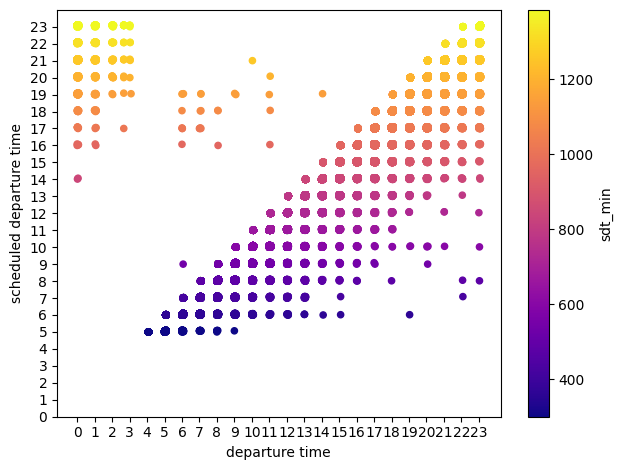

In [39]:
# x = dfc.sdt_min[::5000]
# y = dfc.dt_min[::5000]

# plt.title = "Departure Discrepancies"
# plt.xlabel = "Departure Time"
# plt.ylabel = "Scheduled Departure Time"

# plt.figure(figsize=(18, 12)).tight_layout()
# plt.plot(x, y)

# plt.show()
dfc.plot(
    kind="scatter",
    x="dt_min",
    y="sdt_min",
    c="sdt_min",
    cmap="plasma",
    xlabel="departure time",
    ylabel="scheduled departure time",
)
ticks = np.arange(0, 1440, 60)
t_labels = range(24)
plt.xticks(ticks, t_labels)
plt.yticks(ticks, t_labels)
plt.tight_layout()

In [20]:
dfc.sample(n=5)

,year,month,day,dep_time,dt_min,sched_dep_time,sdt_min,dep_delay,rt_min,arr_time,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,,
11675,2013,1,14,12:03:08,723,12:04:05,724,-7,903,15:03:07,...,2253,N3EMAA,LGA,MIA,150,1096,12,45,2013-01-14 12:00:00,American Airlines Inc.
24589,2013,1,29,10:05:03,605,11:00:00,660,-7,665,11:05:01,...,2124,N958UW,LGA,BOS,36,184,11,0,2013-01-29 11:00:00,US Airways Inc.
60846,2013,11,6,12:05:02,725,12:05:09,725,-7,844,14:04:09,...,1843,N536UW,LGA,CLT,85,544,12,59,2013-11-06 12:00:00,US Airways Inc.
309830,2013,9,1,19:03:00,1143,19:03:02,1143,-2,1320,22:00:04,...,225,N580JB,JFK,TPA,136,1005,19,32,2013-09-01 19:00:00,JetBlue Airways
311121,2013,9,3,09:05:02,545,10:00:00,600,-8,660,11:00:06,...,5736,N829AS,LGA,IAD,47,229,10,0,2013-09-03 10:00:00,ExpressJet Airlines Inc.


In [21]:
dfc.dep_time = pd.to_datetime(dfc.dep_time)
dfc.sched_dep_time = pd.to_datetime(dfc.sched_dep_time)

dfc["dep_in_min"] = dfc.dep_time.dt.hour * 60 + dfc.dep_time.dt.minute
dfc["sched_dep_in_min"] = dfc.sched_dep_time.dt.hour * 60 + dfc.sched_dep_time.dt.minute

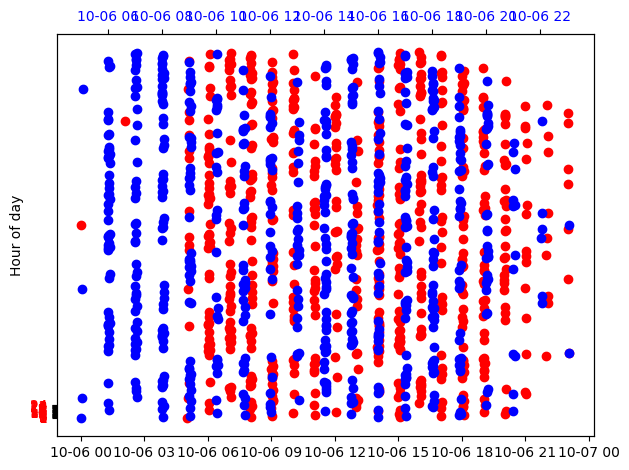

In [22]:
y1 = dfc.dep_time[::500]

y2 = dfc.sched_dep_time[::500]

fig, ax1 = plt.subplots()

# x-axis 1
ax1.scatter(y1, range(len(y1)), color="red", label="Actual Departure")
ax1.tick_params(axis="y", labelcolor="red")

ax1.set_yticks(range(25))
ax1.set_ylabel("Hour of day")

# x-axis 2
ax2 = ax1.twiny()
ax2.scatter(y2, range(len(y2)), color="blue", label="Scheduled Departure")
ax2.tick_params(axis="x", labelcolor="blue")

fig.tight_layout()
plt.show()